In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e24/sample_submission.csv
/kaggle/input/playground-series-s3e24/train.csv
/kaggle/input/playground-series-s3e24/test.csv


**The Goal of this Classification Analysis**

Based on the variables listed in the dataset, we are to predict whether a person based on his/her medical characteristics is a smoker or not. We will first train the model using the training dataset by applying logistic regression. In total there 24 variables with 159256 rows of data. 

* There are 22 variables (x) to observe: age, height(cm) , weight (kg), waist(cm), eyesight(left), eyesight(right),hearing(left), hearing(right), systolic, etc. We exclude ID because it is not a medical variable. It denotes the primary key or unique key of each individual. 

* What we want to predict (y): whether a person smokes (1) or not (0) 

## Exploratory Data Analysis (EDA)

In [2]:
# see the general overview of the training dataset e.g. what variables are there to observe 
df_training =  pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv').copy()
df_training.columns


Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [3]:
#Before analysis, we need to check if there is any missing data or duplicate entry of a patient's ID.   
df_training.info()
print('There are',df_training['id'].duplicated().sum(),'duplicates in this dataset.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [4]:
df_training.describe()


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [5]:
#number of smokers vs number of non-smokers
print(sum(df_training['smoking']==0))
print(sum(df_training['smoking']==1))

89603
69653


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1500 with 0 Axes>

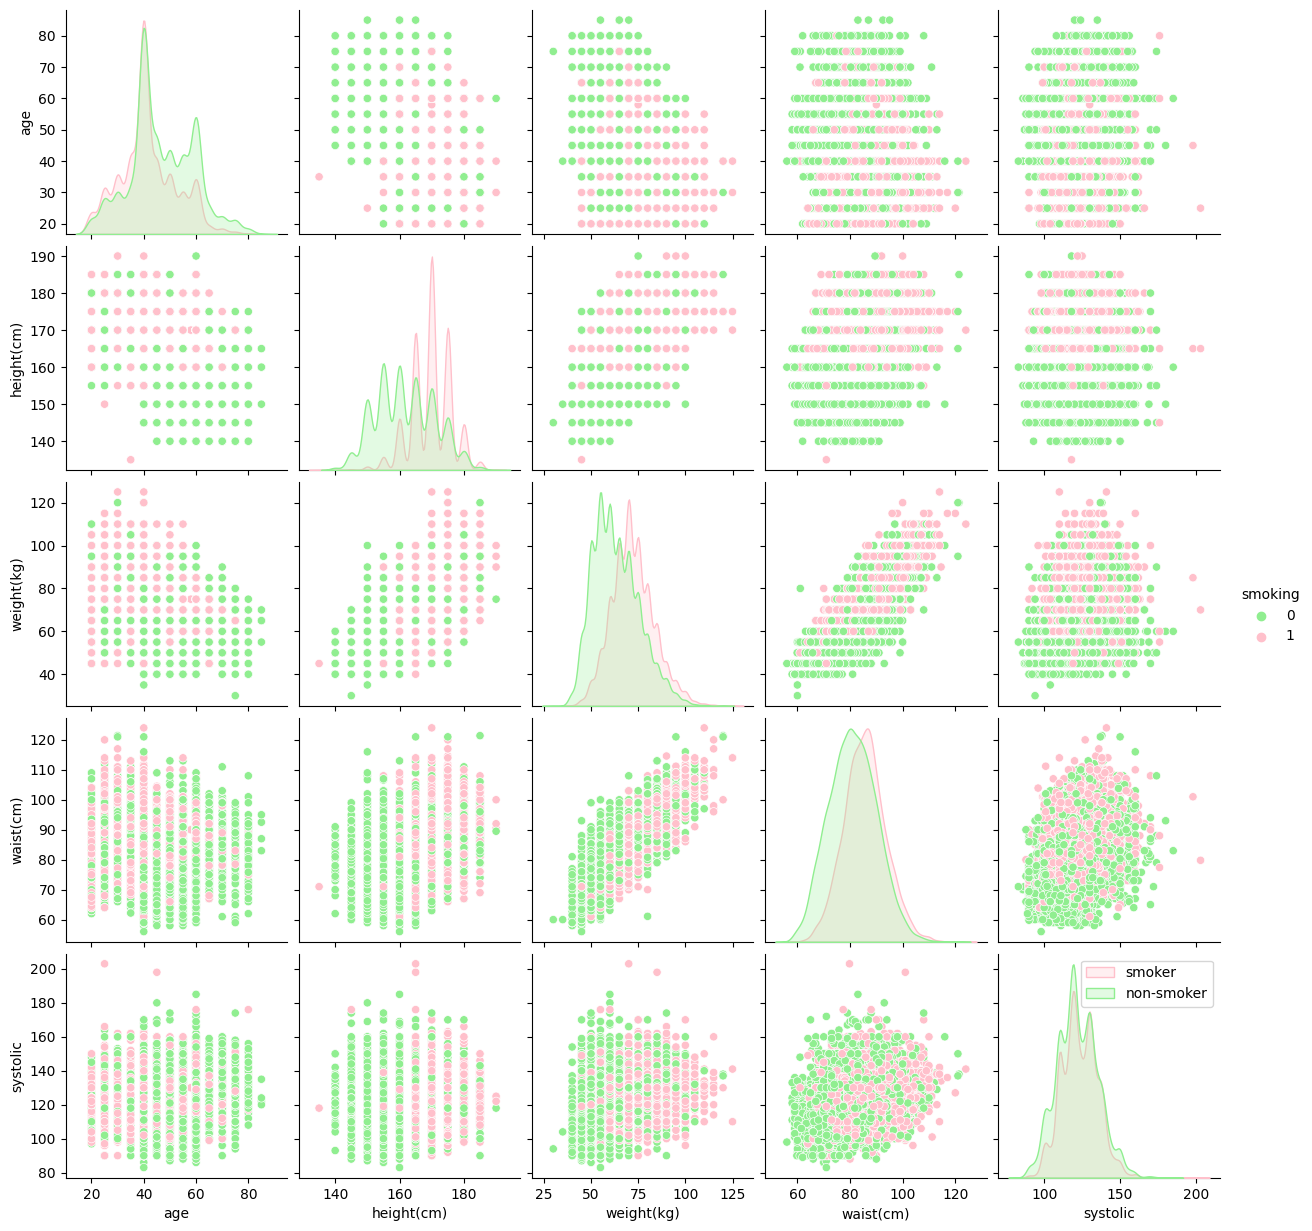

In [6]:
#observe for any correlation between the variables 
import matplotlib.pyplot as plt
import seaborn as sns
n = len(df_training)
frac = 0.10
plt.figure(figsize=(20,15))
sns.pairplot(df_training.sample(frac=frac,random_state=1),hue='smoking',palette=['lightgreen','pink'],vars=['age','height(cm)','weight(kg)','waist(cm)','systolic'])
plt.legend(labels=['smoker','non-smoker'])
plt.show()

**Observations based on the first pairplot:**

* The scatterplot of height (cm) and weight (kg) shows both variables appearing to be positively correlated with one another and individuals who smoke appear to have higher weight and height than to non-smokers. 
* Additionally, the scatterplot of waist (cm) and weight(kg) shows a strong positive correlation with smokers indicated to have higher waist(cm) size and weight(kg) 
* In terms of the frequency distribution, non-smokers in this dataset are generally shorter than smokers. Weight(kg) and waist(cm) among smokers and non-smokers appears to have different distributions with non-smokers positively skewed than smokers. We also can observe that many of the individuals within this dataset are largely in their 40s. 

smoking
0    63.240349
1    72.164961
Name: weight(kg), dtype: float64
smoking
0    80.927077
1    85.671199
Name: waist(cm), dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


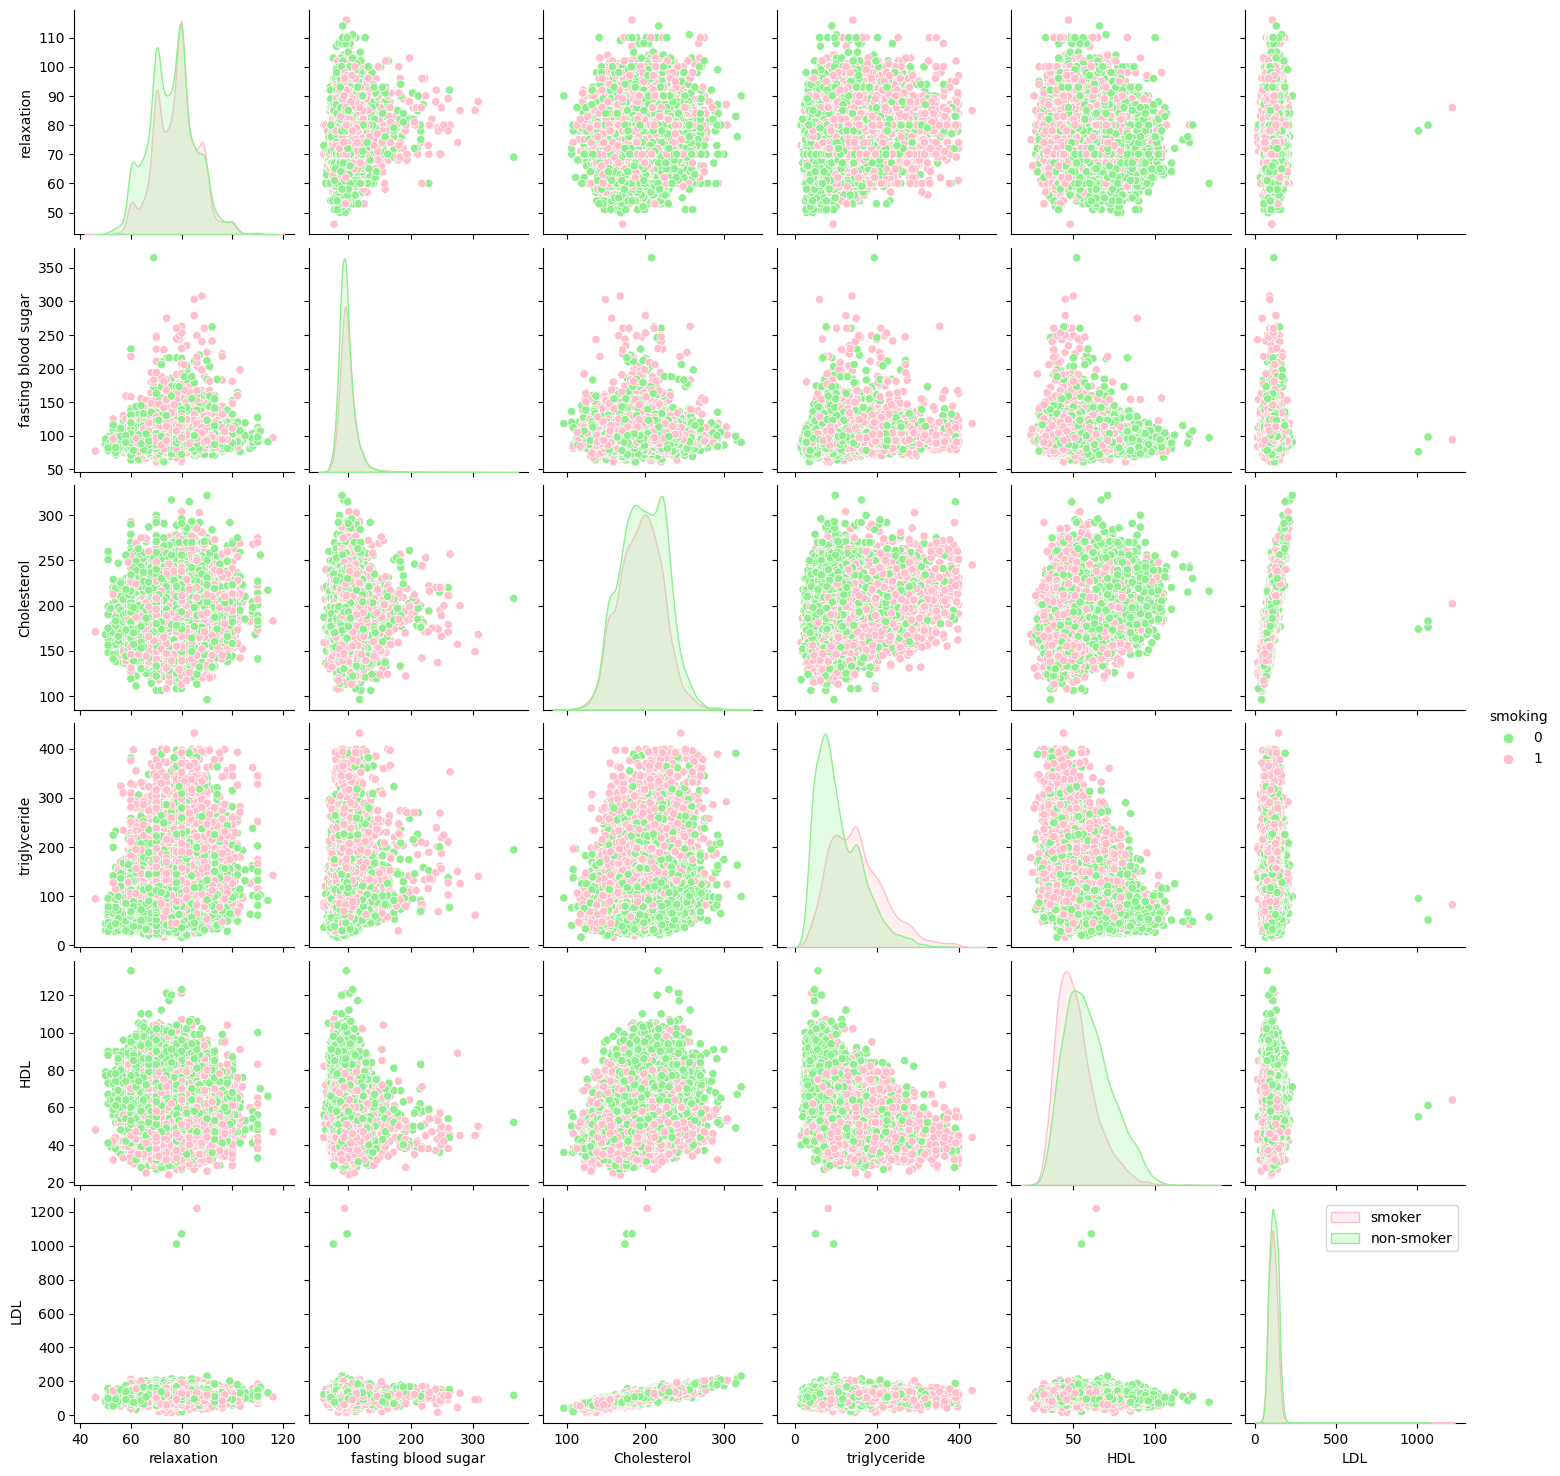

In [7]:
print(df_training.groupby(['smoking'])['weight(kg)'].mean())
print(df_training.groupby(['smoking'])['waist(cm)'].mean())
sns.pairplot(df_training.sample(frac=frac,random_state=1),hue='smoking',palette=['lightgreen','pink'],vars=['relaxation','fasting blood sugar','Cholesterol','triglyceride','HDL','LDL'])
plt.legend(labels=['smoker','non-smoker'])
plt.show()

**Observations based on the second pairplot**

* The scatterplot does not indicate any of the variables carrying strong correlation with one another however, the frequency distribution suggest a difference between smokers and non-smokers. For instance, smokers on average are indicated to have higher fasting blood sugar compared to non-smokers, and  non-smokers on average have higher HDL levels than non-smokers while  non-smoker's triglyceride and LDL appear to be higher than non-smokers. 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


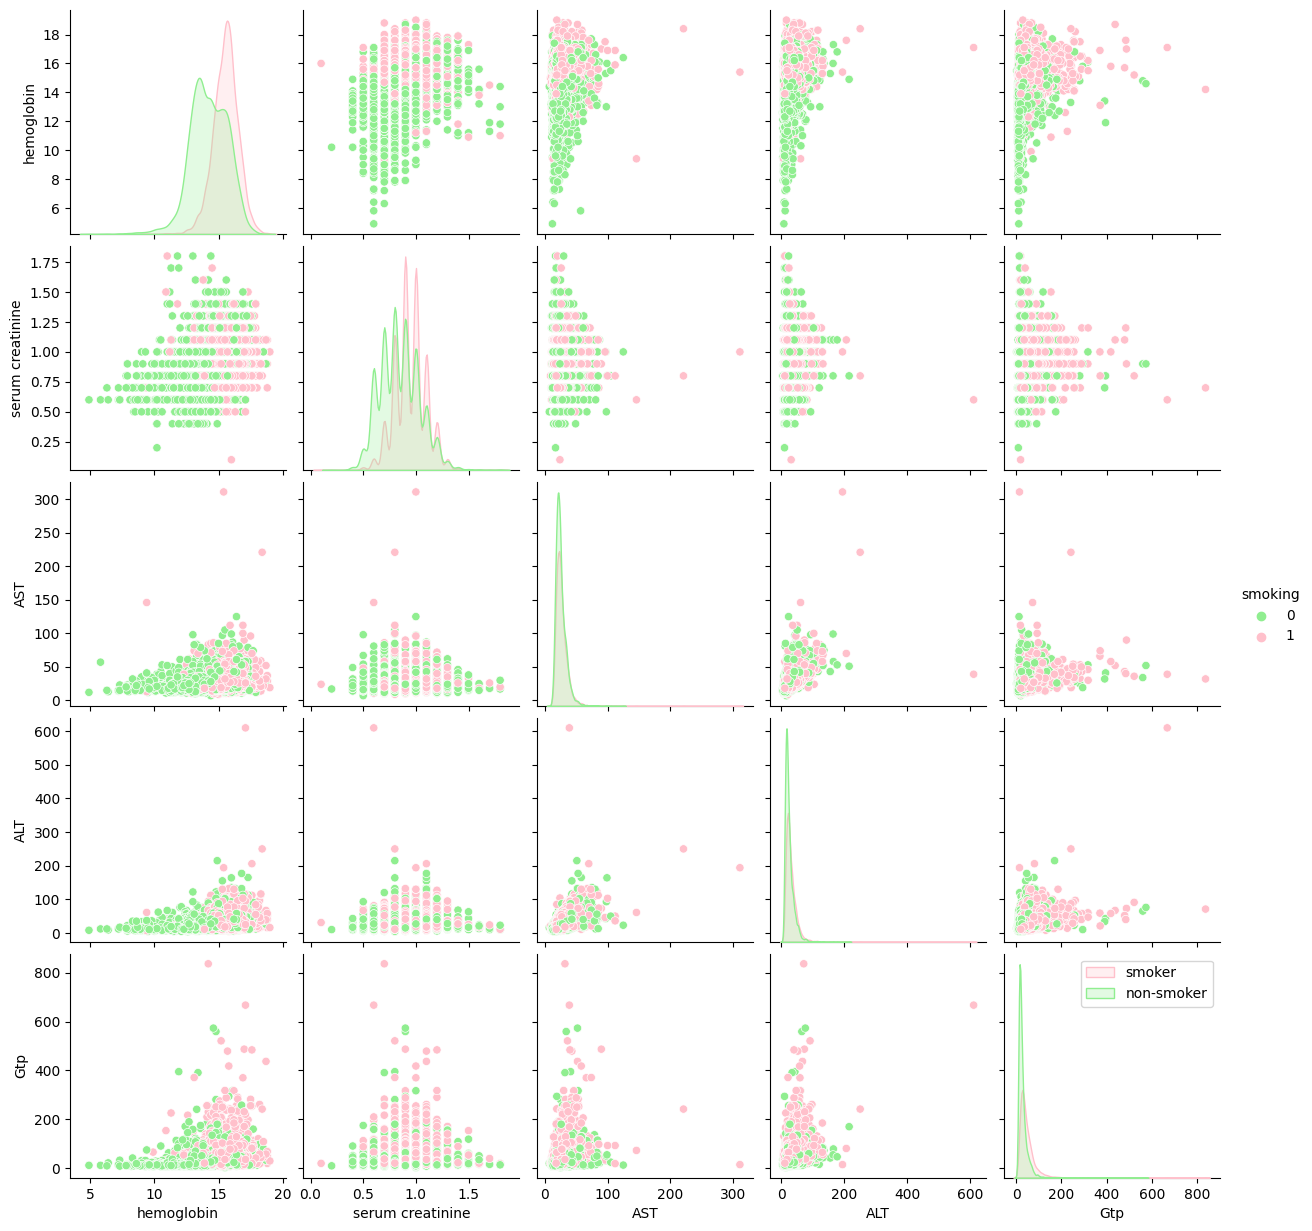

In [8]:
sns.pairplot(df_training.sample(frac=frac,random_state=1),hue='smoking',palette=['lightgreen','pink'],vars=['hemoglobin','serum creatinine','AST','ALT','Gtp'])
plt.legend(labels=['smoker','non-smoker'])
plt.show()

**Observations Based on the Third Pairplot**

* The frequency distribution highlights difference between smokers and non-smokers in terms of hemoglobin levels, serum cretainine, AST, ALT, and Gtp. 
* Regarding hemoglobin and serum cretainine levels, non-smokers' distirbution are more positively skewed and have lower peaks than non-smokers indicating on average lowers levels on both health indicators. In terms of AST, ALT, and Gtp, non-smokers have an extremely high thin peak which indicates most non-smokers have high levels of AST, ALT and Gtp compared to smokers. 

**Categorical Variables observed in this dataset**: dental caries (1/0), Urine Protein (1-6), Hearing (L/R) 

* We will proceed with investigating the categorical variables of this dataset to observe whether there is any difference between smokers and non-smokers.


smoking  Urine protein
0        1                84311
         2                 3549
         3                 1402
         4                  287
         5                   48
         6                    6
1        1                66551
         2                 2060
         3                  826
         4                  190
         5                   26
Name: id, dtype: int64
Urine protein
1    150862
2      5609
3      2228
4       477
5        74
6         6
Name: count, dtype: int64


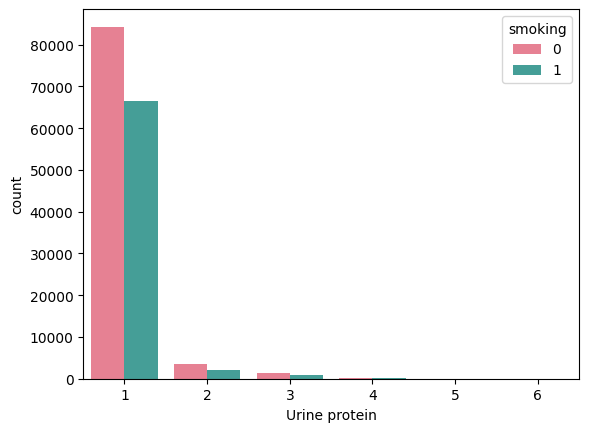

In [9]:
sns.countplot(x='Urine protein',hue='smoking',data=df_training,palette='husl')
print(df_training.groupby(['smoking','Urine protein'])['id'].count())
print(df_training['Urine protein'].value_counts())

<Axes: xlabel='hearing(right)', ylabel='count'>

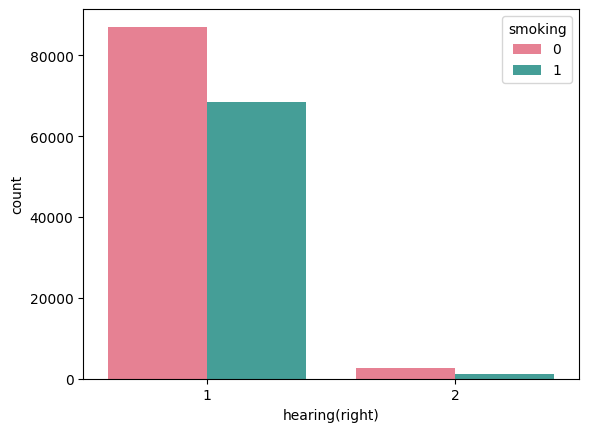

In [10]:
sns.countplot(x='hearing(right)',hue='smoking',data=df_training,palette='husl')


<Axes: xlabel='hearing(left)', ylabel='count'>

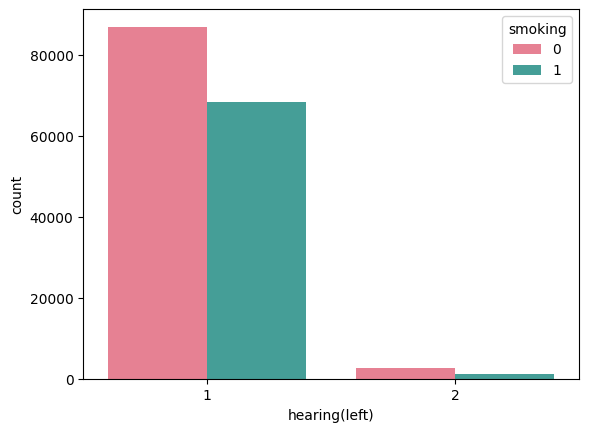

In [11]:
sns.countplot(x='hearing(left)',hue='smoking',data=df_training,palette='husl')

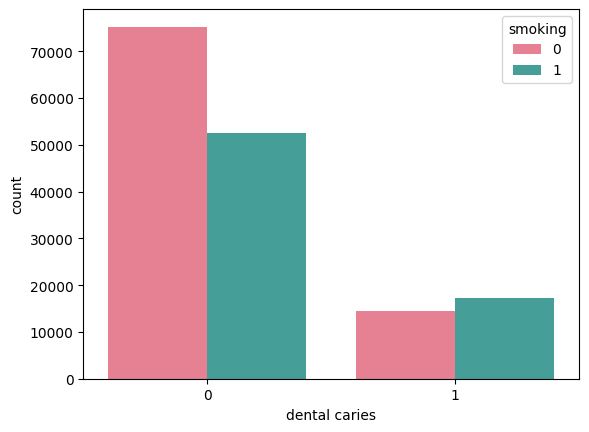

In [12]:
sns.countplot(x='dental caries',hue='smoking',data=df_training,palette='husl')
plt.show()

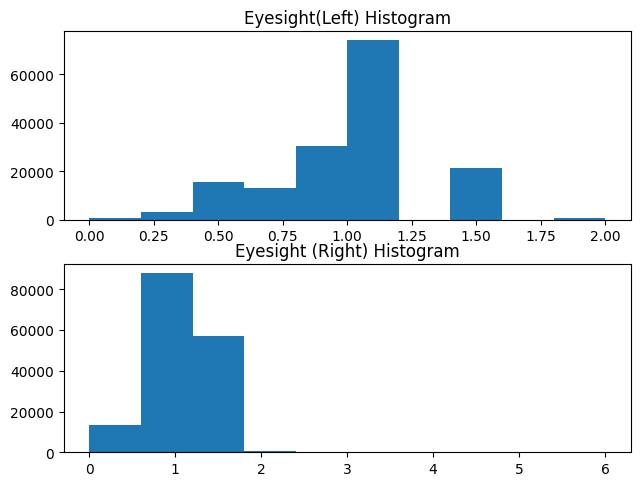

In [13]:
fig, ax = plt.subplots(2)
fig.tight_layout()
ax[0].hist(df_training['eyesight(left)'],range=[0,2])
ax[0].set_title('Eyesight(Left) Histogram')

ax[1].hist(df_training['eyesight(right)'],range=[0,6])
ax[1].set_title('Eyesight (Right) Histogram')

plt.show()

**Observation based on the countplot**

The countplot above shows not much difference between smoking and non-smoking individuals. 


## Checking for Multicollinearity 
This occurs when two or more features are highly correlated with one another. This could lead to unreliable model coefficients,as the model may be unable to distinguish the unique contributions of each feature to the target variable (in this case, smoking status of each individual). 

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
tested_var = df_training[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries']]

# Add column of constants for VIF function
X_const = add_constant(tested_var)

# Compute the variance inflation factor (VIF) for each feature
vif = pd.Series([variance_inflation_factor(X_const.values, i) for i in range(tested_var.shape[1])], 
                index = tested_var.columns)
print("Variance Inflation Factors:")
print(vif)

Variance Inflation Factors:
age                    1241.196843
height(cm)                1.819860
weight(kg)                2.914232
waist(cm)                 6.801537
eyesight(left)            4.587990
eyesight(right)           1.295453
hearing(left)             1.303434
hearing(right)            1.464435
systolic                  1.465958
relaxation                2.456496
fasting blood sugar       2.409581
Cholesterol               1.126579
triglyceride              7.333365
HDL                       3.001219
LDL                       3.221737
hemoglobin                6.107126
Urine protein             1.848828
serum creatinine          1.005056
AST                       1.405490
ALT                       1.742144
Gtp                       1.986463
dental caries             1.335002
dtype: float64


Based on the output above, multicollinearity is present. Generally a VIF greater than 10 is considered high. In this case, age has a very high multicollinearity. The higher the VIF, the more linearly related that variable is with the other variables.
From the output, we can see that there is multicollinearity present. We should consider removing age from the feature set due to the high multicollinearity value.

Furthermore, there are no missing values or any duplicate entries, we will proceed with conducting our analysis. We will split df_training into 2: 
* df_train_model : train the logistic regression model based on the subset of df_training dataset
* df_train_validate : to test accuracy before using the testing dataset 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X = df_training.drop(['smoking','id'],axis=1)
y = df_training['smoking']


In [17]:
# Label encoding for categoricals
for colname in X.select_dtypes("int64"):
    X['Urine protein'], _ = X['Urine protein'].factorize()
    X['hearing(left)'],_ = X['hearing(left)'].factorize()
    X['hearing(right)'],_ = X['hearing(right)'].factorize()
    X['dental caries'], _ = X['dental caries'].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int



## Checking which features to keep based on Mutual Information Score 


In [18]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores.head(5)



height(cm)      0.138513
hemoglobin      0.132258
Gtp             0.104788
weight(kg)      0.085066
triglyceride    0.074302
Name: MI Scores, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


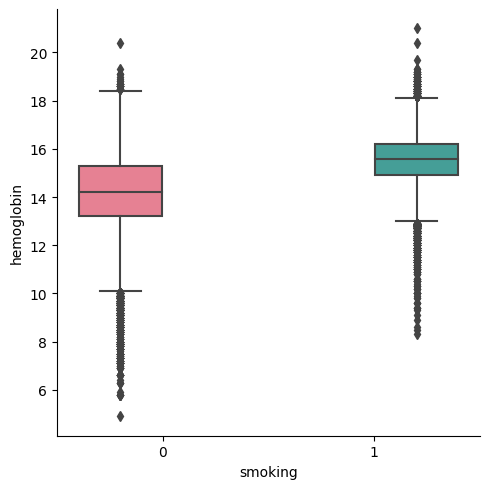

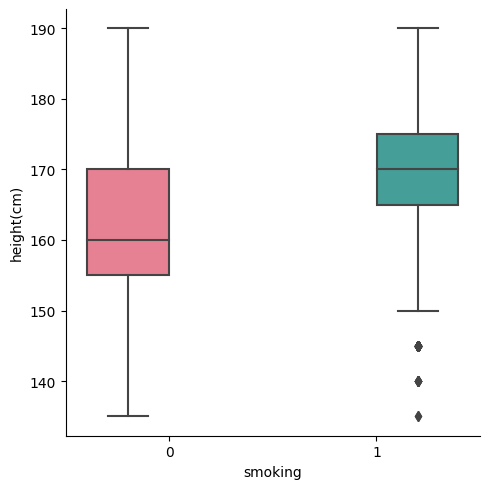

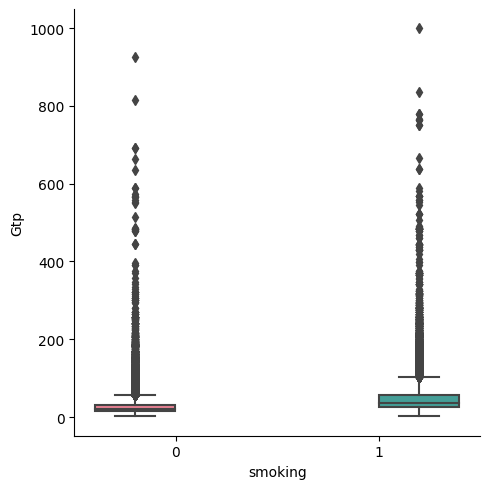

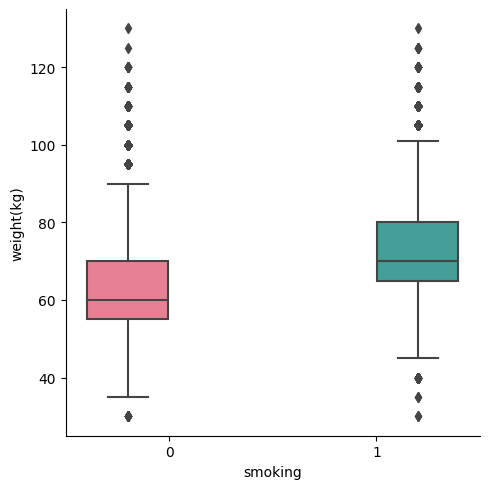

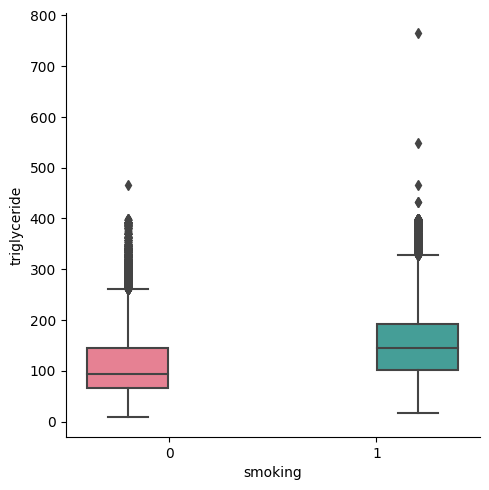

In [19]:

sns.catplot(data=df_training,x='smoking',y='hemoglobin',palette='husl',hue='smoking',kind='box')
sns.catplot(data=df_training,x='smoking',y='height(cm)',palette='husl',hue='smoking',kind='box')
sns.catplot(data=df_training,x='smoking',y='Gtp',palette='husl',hue='smoking',kind='box')
sns.catplot(data=df_training,x='smoking',y='weight(kg)',palette='husl',kind='box',hue='smoking')
sns.catplot(data=df_training,x='smoking',y='triglyceride',palette='husl',kind='box',hue='smoking')


Based on the Mutual Information (MI) score output, we should regard hemoglobin, height(cm), Gtp, weight(kg) and triglyceride as important features to consider. This is consistent with our exploratory analysis previously based on the pairplot. 

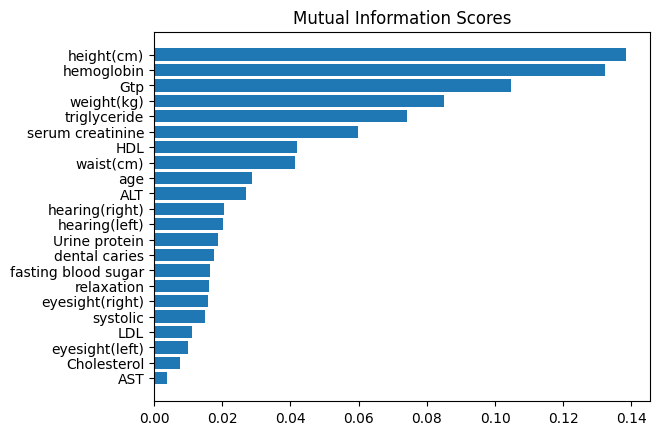

In [20]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plot_mi_scores(mi_scores)

### Feature Selection Based on P-Value

* For this case, let us pick p-value of 0.05

In [21]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.518628
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                smoking   No. Observations:               159256
Model:                          Logit   Df Residuals:                   159234
Method:                           MLE   Df Model:                           21
Date:                Wed, 29 Nov 2023   Pseudo R-squ.:                  0.2432
Time:                        13:32:49   Log-Likelihood:                -82595.
converged:                       True   LL-Null:                   -1.0913e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0143      0.001    -21.539      0.000      -0.016      -0.013
he

The p-values of most variables is less than 0.05 except for eyesight(right) which we will remove. 

## Feature Engineering
* Combine hearing(left) and hearing(right) into average hearing 
* Combine eyesight(left) and eyesight (right) into average eyesight 
* Height to Waist Ratio: a ratio of 0.5 to 0.59 puts people at increased risk of health problems while a waist-to-height ratio of 0.6 or more places people at the highest risk of disease [Source1](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwj7y9LM_riCAxV-9zgGHTP8AIUQFnoECAwQAw&url=https%3A%2F%2Fwww.baker.edu.au%2Fnews%2Fin-the-media%2Fwaist-height-ratio%23%3A~%3Atext%3DWaist%252Dto%252Dheight%2520numbers%2520to%2Cthe%2520highest%2520risk%2520of%2520disease.&usg=AOvVaw1k4KGiKZuHH-So5tQQbOj4&opi=89978449)
* Cholesterol Ratio: Cholestrol / HDL. Higher ratios indicate higher risk of heart disease [Source2](https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/expert-answers/cholesterol-ratio/faq-20058006). A good cholesterol ratio shows that the body is working properly and is healthy. It signals that someone is in good health and is probably taking care of themselves [Source3](https://www.medicalnewstoday.com/articles/316586#Good-vs-bad).
* AST/ALT ratio: A normal ratio would be <1. This is an indicator of a person's liver health. [Source 4](https://www.verywellhealth.com/liver-enzymes-1759916)
* triglyceride / HDL ratio: The triglyceride/HDL level which is considered ideal is 2 or less; 4 is high and 6 or greater is considered too high [Source5](https://www.journal-advocate.com/2012/02/27/the-importance-of-triglyceridehdl-ratio/#)

In [22]:
df = df_training.copy()
df['average eyesight'] = (df_training['eyesight(left)'] + df_training['eyesight(right)'])/2
df['average hearing'] = (df_training['hearing(left)'] + df_training['hearing(right)'])/2 
df['Cholesterol-HDL ratio'] = df_training['Cholesterol']/df_training['HDL']
df['AST-ALT ratio']=df_training['AST']/df_training['ALT']
df['triglyceride-HDL ratio']=df_training['triglyceride']/df_training['HDL']
df = df.drop(columns=['eyesight(left)','eyesight(right)','hearing(left)','hearing(right)','AST','ALT','triglyceride','HDL','age','Cholesterol','Gtp'])
df.head()

,id,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,LDL,hemoglobin,Urine protein,serum creatinine,dental caries,smoking,average eyesight,average hearing,Cholesterol-HDL ratio,AST-ALT ratio,triglyceride-HDL ratio
0,0,165,60,81.0,135,87,94,75,16.5,1,1.0,0,1,0.55,1.0,4.300000,0.880000,7.500000
1,1,165,65,89.0,146,83,147,126,16.2,1,1.1,1,0,0.65,2.0,3.403509,1.173913,0.964912
2,2,170,75,81.0,118,75,79,93,17.4,1,0.8,0,1,0.45,1.0,3.955556,0.870968,4.377778
3,3,180,95,105.0,131,88,91,102,15.9,1,1.0,1,0,1.35,1.0,4.736842,0.740741,5.342105
4,4,165,60,80.5,121,76,91,93,15.4,1,0.8,0,1,1.25,1.0,3.522727,1.461538,1.977273


In [23]:
X = df.drop(['smoking','id'],axis=1)
y = df['smoking']

In [24]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.549093
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                smoking   No. Observations:               159256
Model:                          Logit   Df Residuals:                   159240
Method:                           MLE   Df Model:                           15
Date:                Wed, 29 Nov 2023   Pseudo R-squ.:                  0.1987
Time:                        13:32:50   Log-Likelihood:                -87446.
converged:                       True   LL-Null:                   -1.0913e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
height(cm)                -0.0098      0.001    -13.855      0.000      -0.011      

The second table shows that the Cholesterol-HDL ratio is above 0.05. Additionally, the transformation of eyesight does not reduce the p-value to become less than 0.05. Therefore, we will proceed to remove this variable from the final model. 

In [25]:
df['Cholesterol'] = df_training['Cholesterol']
df['HDL']=df_training['HDL']
df = df.drop(['Cholesterol-HDL ratio','average eyesight'],axis=1)
X = df.drop(['smoking','id'],axis=1)
X.head()


,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,LDL,hemoglobin,Urine protein,serum creatinine,dental caries,average hearing,AST-ALT ratio,triglyceride-HDL ratio,Cholesterol,HDL
0,165,60,81.0,135,87,94,75,16.5,1,1.0,0,1.0,0.880000,7.500000,172,40
1,165,65,89.0,146,83,147,126,16.2,1,1.1,1,2.0,1.173913,0.964912,194,57
2,170,75,81.0,118,75,79,93,17.4,1,0.8,0,1.0,0.870968,4.377778,178,45
3,180,95,105.0,131,88,91,102,15.9,1,1.0,1,1.0,0.740741,5.342105,180,38
4,165,60,80.5,121,76,91,93,15.4,1,0.8,0,1.0,1.461538,1.977273,155,44


In [26]:
#Normalise the dataset by using StandardScaler() as the variables have all  wide range of values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
X_norm_test = scaler.fit_transform(X_test)

#fitting the model using logistic regression 
lr_model = LogisticRegression()
lr_model.fit(X_norm,y_train)
y_pred = lr_model.predict(X_norm_test)
predicted_probabilities = lr_model.predict_proba(X_norm_test)
predicted_probabilities[:,1]

array([0.82668189, 0.81542775, 0.64329454, ..., 0.18345773, 0.20196922,
       0.88449119])

In [27]:
#Checking for accuracy 
from sklearn import metrics
results = metrics.accuracy_score(y_pred, y_test)
results

0.7323185234516221

We will apply the linear regression model created to the testing dataset. 

In [28]:
# see the general overview of the testing dataset 
df_test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
df_test.head(5)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   106171 non-null  int64  
 1   age                  106171 non-null  int64  
 2   height(cm)           106171 non-null  int64  
 3   weight(kg)           106171 non-null  int64  
 4   waist(cm)            106171 non-null  float64
 5   eyesight(left)       106171 non-null  float64
 6   eyesight(right)      106171 non-null  float64
 7   hearing(left)        106171 non-null  int64  
 8   hearing(right)       106171 non-null  int64  
 9   systolic             106171 non-null  int64  
 10  relaxation           106171 non-null  int64  
 11  fasting blood sugar  106171 non-null  int64  
 12  Cholesterol          106171 non-null  int64  
 13  triglyceride         106171 non-null  int64  
 14  HDL                  106171 non-null  int64  
 15  LDL              

In [29]:
df_test.isnull().sum()
df_test['id'].duplicated().sum()

0

In [30]:
df_test_final = df_test.copy()
df_test_final['average hearing'] = (df_test_final['hearing(left)'] + df_test_final['hearing(right)'])/2 
df_test_final['AST-ALT ratio']=df_test_final['AST']/df_test_final['ALT']
df_test_final['triglyceride-HDL ratio']=df_test_final['triglyceride']/df_test_final['HDL']
df_test_final = df_test_final.drop(columns=['eyesight(left)','eyesight(right)','hearing(left)','hearing(right)','AST','ALT','triglyceride','age','Gtp'])
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      106171 non-null  int64  
 1   height(cm)              106171 non-null  int64  
 2   weight(kg)              106171 non-null  int64  
 3   waist(cm)               106171 non-null  float64
 4   systolic                106171 non-null  int64  
 5   relaxation              106171 non-null  int64  
 6   fasting blood sugar     106171 non-null  int64  
 7   Cholesterol             106171 non-null  int64  
 8   HDL                     106171 non-null  int64  
 9   LDL                     106171 non-null  int64  
 10  hemoglobin              106171 non-null  float64
 11  Urine protein           106171 non-null  int64  
 12  serum creatinine        106171 non-null  float64
 13  dental caries           106171 non-null  int64  
 14  average hearing     

In [31]:
X_new = df_test_final.drop(['id'],axis=1)
# Label encoding for categoricals
for colname in X_new.select_dtypes("int64"):
    X_new['Urine protein'], _ = X_new['Urine protein'].factorize()
    X_new['average hearing'],_ = X_new['average hearing'].factorize()
    X_new['dental caries'], _ = X_new['dental caries'].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
X_norm_new = scaler.fit_transform(X_new)
y_pred_testingset = lr_model.predict(X_norm_new)
predicted_probabilities = lr_model.predict_proba(X_norm_new)[:,1]


final_data = {'id': list(df_test['id']), 'smoking':list(predicted_probabilities) }
df_new = pd.DataFrame(final_data)
df_new



,id,smoking
0,159256,0.137634
1,159257,0.343281
2,159258,0.262664
3,159259,0.590136
4,159260,0.290893
...,...,...
106166,265422,0.278807
106167,265423,0.308180
106168,265424,0.290441
106169,265425,0.481723


In [32]:
df_new.to_csv('df_submission_file.csv',index=False)